# Automobile Dataset
Dataset consist of various characteristic of an auto

## 1. Importing the data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from joblib import dump,load

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/Automobile_data.csv")

## 2. Exploratory data analysis (EDA)

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.shape

(205, 26)

In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df.isnull().sum() # number of null/missing values in each column

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [12]:
df["num-of-doors"].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [13]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [14]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [15]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [16]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [17]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [18]:
df["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [19]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

### 2.1 Data cleaning

In [20]:
# remove the symboling column
df = df.drop("symboling", axis=1)

# replace the unknown data and convert the normalized-losses column to float
# to replace the values with the average
df["normalized-losses"] = df["normalized-losses"].replace("?", np.nan).astype(float)
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, df["normalized-losses"].mean())

df["price"] = df["price"].replace("?", np.nan).dropna()
df["price"] = df["price"].astype(float)

df["horsepower"] = df["horsepower"].replace("?", np.nan).dropna()
df["horsepower"] = df["horsepower"].astype(float)

df["peak-rpm"] = df["peak-rpm"].replace("?", np.nan).dropna()
df["peak-rpm"] = df["peak-rpm"].astype(float)

df["bore"] = df["bore"].replace("?", np.nan).dropna()
df["bore"] = df["bore"].astype(float)

df["stroke"] = df["stroke"].replace("?", np.nan).dropna()
df["stroke"] = df["stroke"].astype(float)

df["num-of-doors"] = df["num-of-doors"].replace("two", "2")
df["num-of-doors"] = df["num-of-doors"].replace("four", "4")
df["num-of-doors"] = df["num-of-doors"].replace("?", np.nan).dropna()
df["num-of-doors"] = df["num-of-doors"].astype(float)

df["num-of-cylinders"] = df["num-of-cylinders"].replace("four", "4")
df["num-of-cylinders"] = df["num-of-cylinders"].replace("six", "6")
df["num-of-cylinders"] = df["num-of-cylinders"].replace("five", "5")
df["num-of-cylinders"] = df["num-of-cylinders"].replace("eight", "8")
df["num-of-cylinders"] = df["num-of-cylinders"].replace("two", "2")
df["num-of-cylinders"] = df["num-of-cylinders"].replace("three", "3")
df["num-of-cylinders"] = df["num-of-cylinders"].replace("twelve", "12")
df["num-of-cylinders"] = df["num-of-cylinders"].replace("?", np.nan).dropna()
df["num-of-cylinders"] = df["num-of-cylinders"].astype(int)

df["fuel-type"] = df["fuel-type"].replace("gas","1")
df["fuel-type"] = df["fuel-type"].replace("diesel","0")
df["fuel-type"] = df["fuel-type"].astype(int)

In [21]:
# making sure the missing data is dropped
df.dropna(how="any", inplace=True)

In [22]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,alfa-romero,1,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,alfa-romero,1,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,alfa-romero,1,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,audi,1,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,1,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  193 non-null    float64
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    int32  
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    float64
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    int32  
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

### 2.2 Visualizations

In [24]:
sns.set_style("darkgrid")

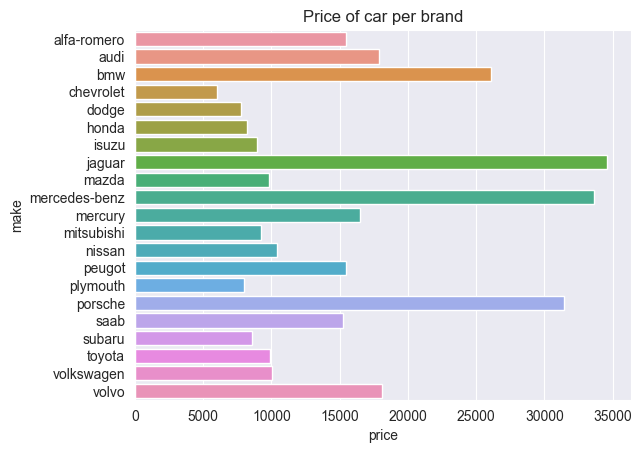

In [26]:
sns.barplot(y="make", x="price",data=df, errorbar=None) # if you want to make it horizontal just invert X,Y
plt.title("Price of car per brand")
plt.show()

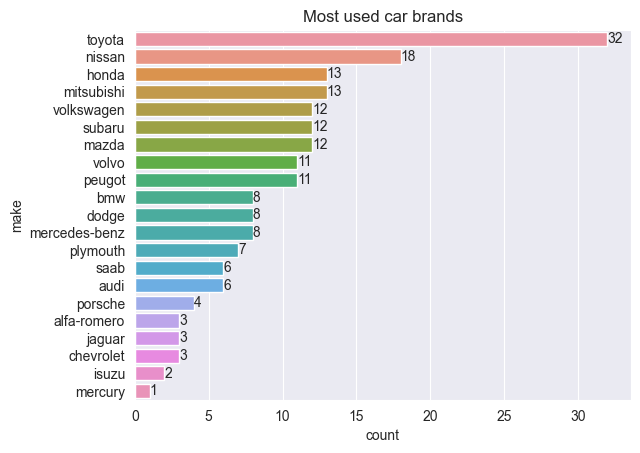

In [27]:
ax= sns.countplot(y="make", data=df, order = df['make'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Most used car brands")
plt.show()

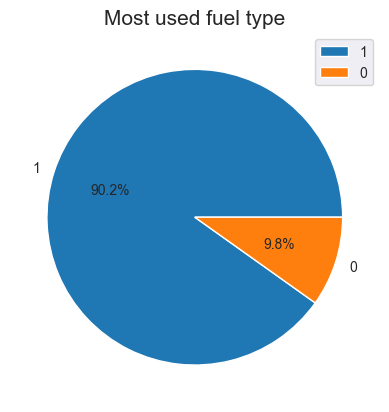

In [28]:
df["fuel-type"].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.title("Most used fuel type",fontsize=15)
plt.ylabel("")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Price of the car per fuel type')

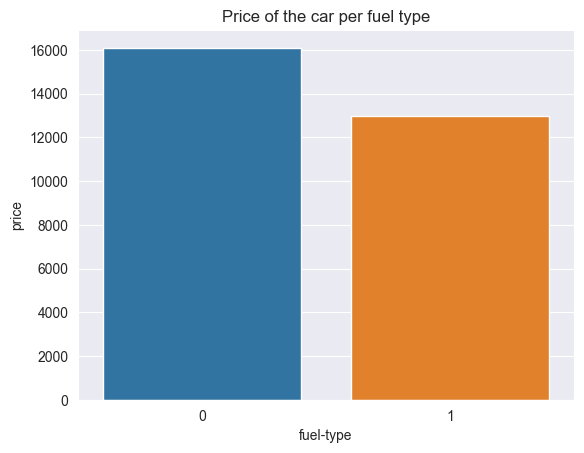

In [29]:
sns.barplot(x="fuel-type", y="price", data=df, errorbar=None)
plt.title("Price of the car per fuel type")

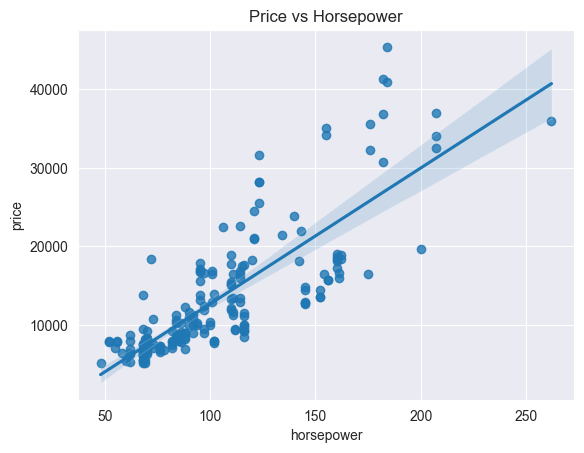

In [30]:
sns.regplot(x="horsepower", y="price", data=df)
plt.title("Price vs Horsepower")
plt.show()

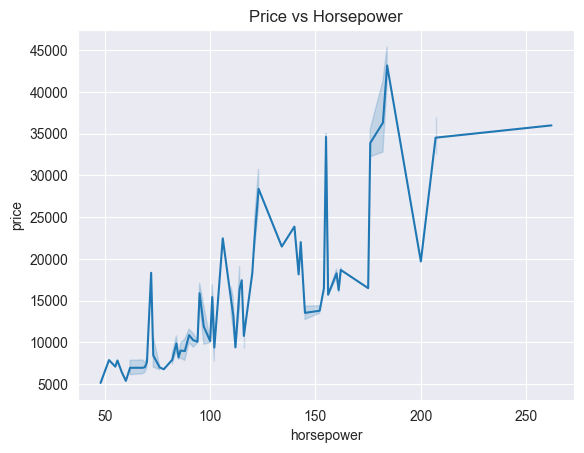

In [31]:
sns.lineplot(x="horsepower", y="price", data=df)
plt.title("Price vs Horsepower")
plt.show()

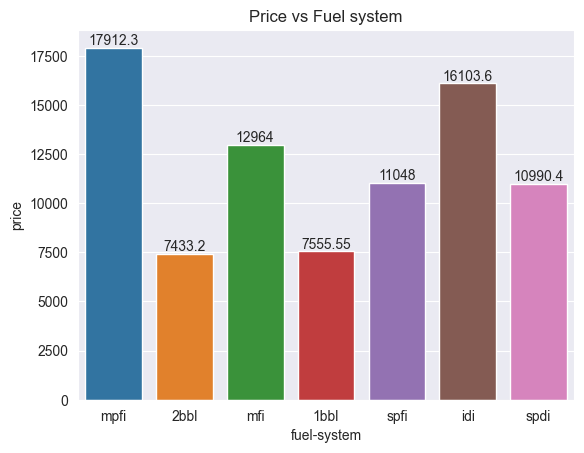

In [32]:
ax= sns.barplot(x="fuel-system", y="price", data=df,errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Price vs Fuel system")
plt.show()

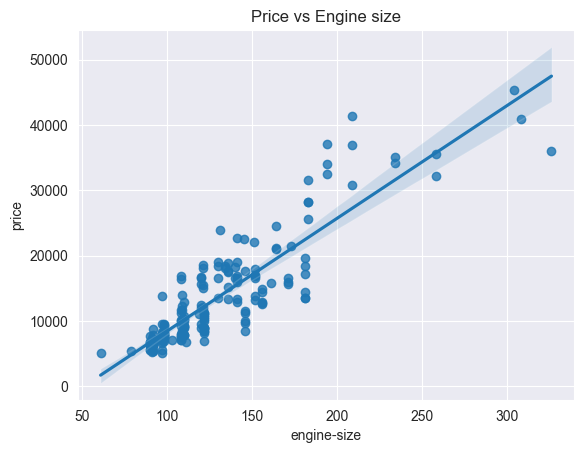

In [33]:
sns.regplot(x="engine-size", y="price", data=df)
plt.title("Price vs Engine size")
plt.show()

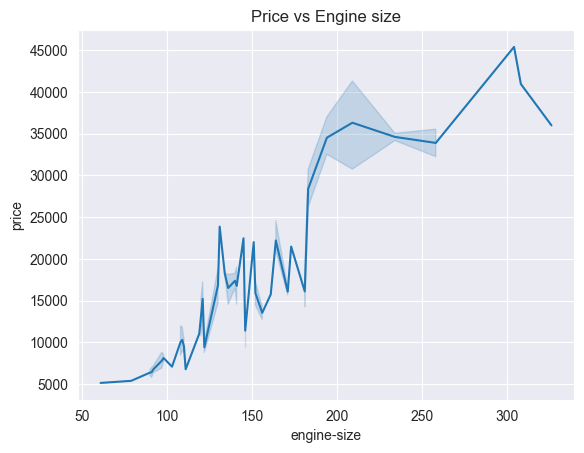

In [34]:
sns.lineplot(x="engine-size", y="price", data=df)
plt.title("Price vs Engine size")
plt.show()

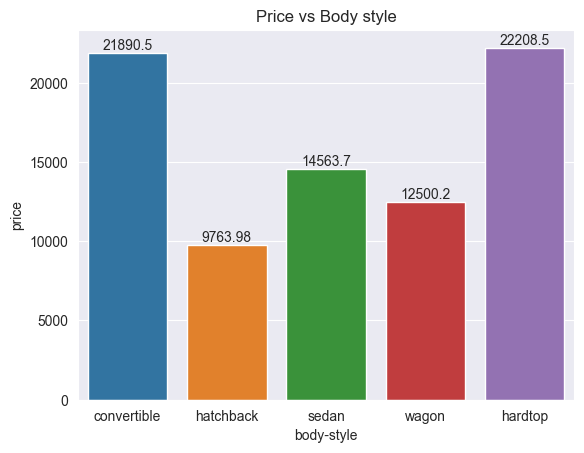

In [35]:
ax= sns.barplot(x="body-style", y="price", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Price vs Body style")
plt.show()

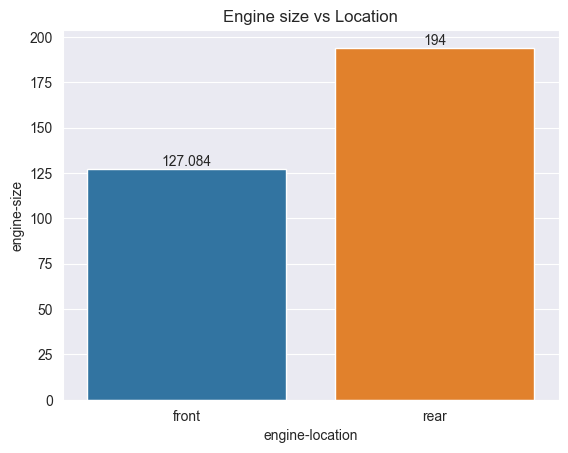

In [36]:
ax= sns.barplot(x="engine-location", y="engine-size", data= df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Engine size vs Location")
plt.show()

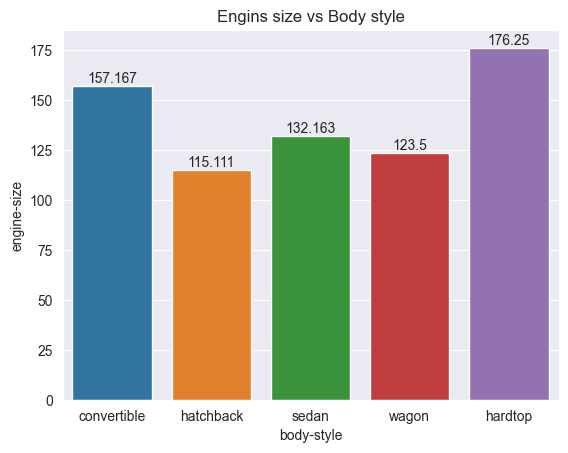

In [37]:
ax= sns.barplot(x="body-style", y="engine-size", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Engins size vs Body style")
plt.show()

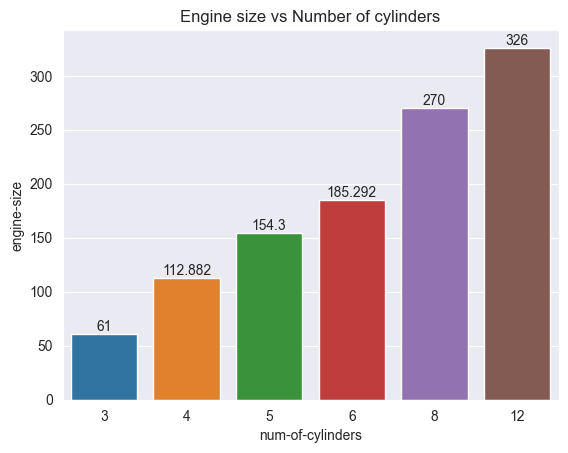

In [38]:
ax= sns.barplot(x="num-of-cylinders", y="engine-size", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Engine size vs Number of cylinders")
plt.show()

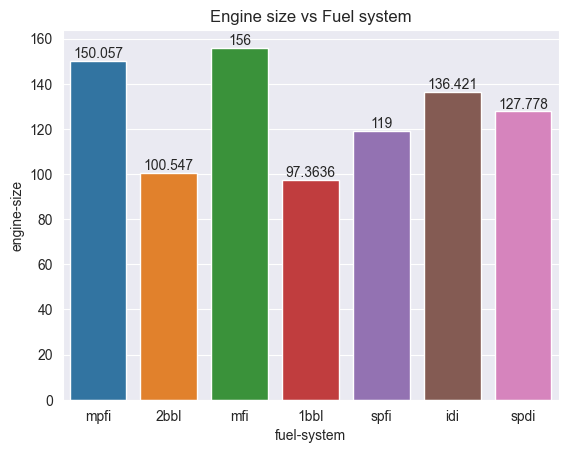

In [39]:
ax= sns.barplot(x="fuel-system", y="engine-size", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Engine size vs Fuel system")
plt.show()

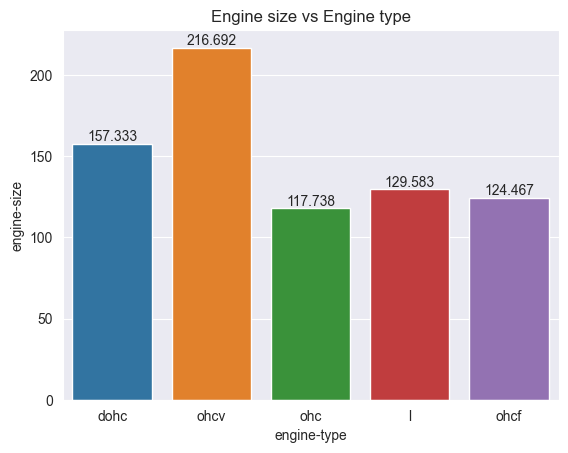

In [40]:
ax= sns.barplot(x="engine-type", y="engine-size", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Engine size vs Engine type")
plt.show()

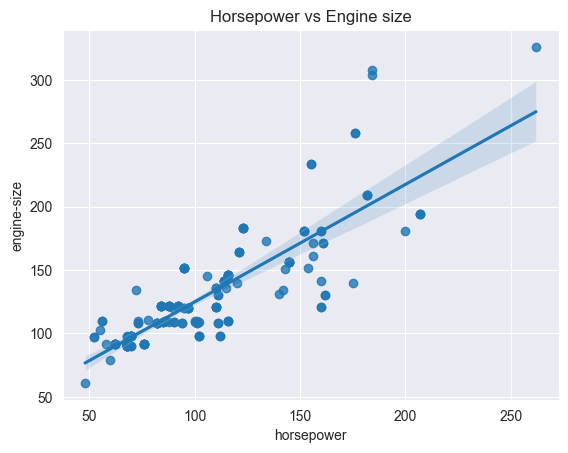

In [41]:
sns.regplot(x="horsepower", y="engine-size",data=df)
plt.title("Horsepower vs Engine size")
plt.show()

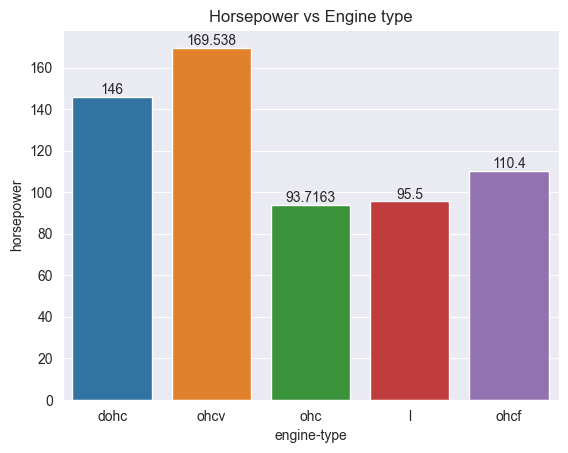

In [42]:
ax= sns.barplot(x="engine-type", y="horsepower", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Horsepower vs Engine type")
plt.show()

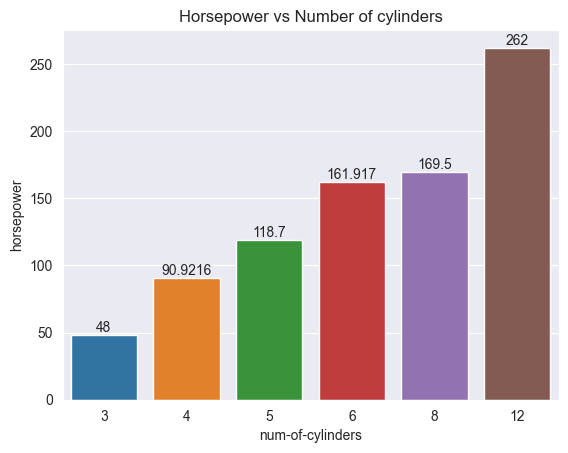

In [43]:
ax= sns.barplot(x="num-of-cylinders", y="horsepower", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Horsepower vs Number of cylinders")
plt.show()

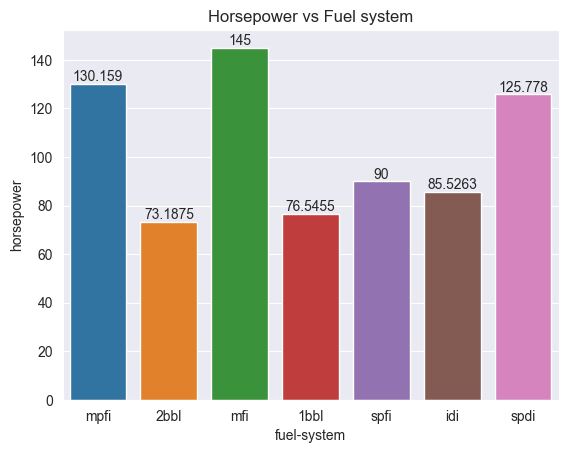

In [44]:
ax= sns.barplot(x="fuel-system", y="horsepower", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Horsepower vs Fuel system")
plt.show()

In [45]:
corr = df.corr()
corr

,normalized-losses,fuel-type,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
normalized-losses,1.000000,0.097808,-0.355703,-0.043395,0.033177,0.093666,-0.355796,0.108699,0.163198,0.142821,-0.025608,0.054589,-0.112980,0.217727,0.213594,-0.208081,-0.166290,0.138700
fuel-type,0.097808,1.000000,-0.175294,-0.310196,-0.209882,-0.245662,-0.274296,-0.227255,0.033643,-0.066091,-0.052378,-0.253837,-0.984951,0.156712,0.477885,-0.242396,-0.174032,-0.115440
num-of-doors,-0.355703,-0.175294,1.000000,0.447460,0.400636,0.235345,0.523799,0.209849,-0.051492,-0.003019,0.127156,-0.008421,0.161471,-0.097046,-0.200355,-0.068485,-0.082160,0.046460
wheel-base,-0.043395,-0.310196,0.447460,1.000000,0.879307,0.818465,0.591239,0.782173,0.339445,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,0.033177,-0.209882,0.400636,0.879307,1.000000,0.857368,0.491050,0.882694,0.447885,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,0.093666,-0.245662,0.235345,0.818465,0.857368,1.000000,0.310640,0.867640,0.546950,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.355796,-0.274296,0.523799,0.591239,0.491050,0.310640,1.000000,0.305837,-0.080062,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,0.108699,-0.227255,0.209849,0.782173,0.882694,0.867640,0.305837,1.000000,0.624581,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
num-of-cylinders,0.163198,0.033643,-0.051492,0.339445,0.447885,0.546950,-0.080062,0.624581,1.000000,0.847676,0.215092,0.024729,-0.025383,0.715670,-0.074711,-0.539838,-0.562873,0.746007
engine-size,0.142821,-0.066091,-0.003019,0.568375,0.686998,0.739903,0.026906,0.857188,0.847676,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778


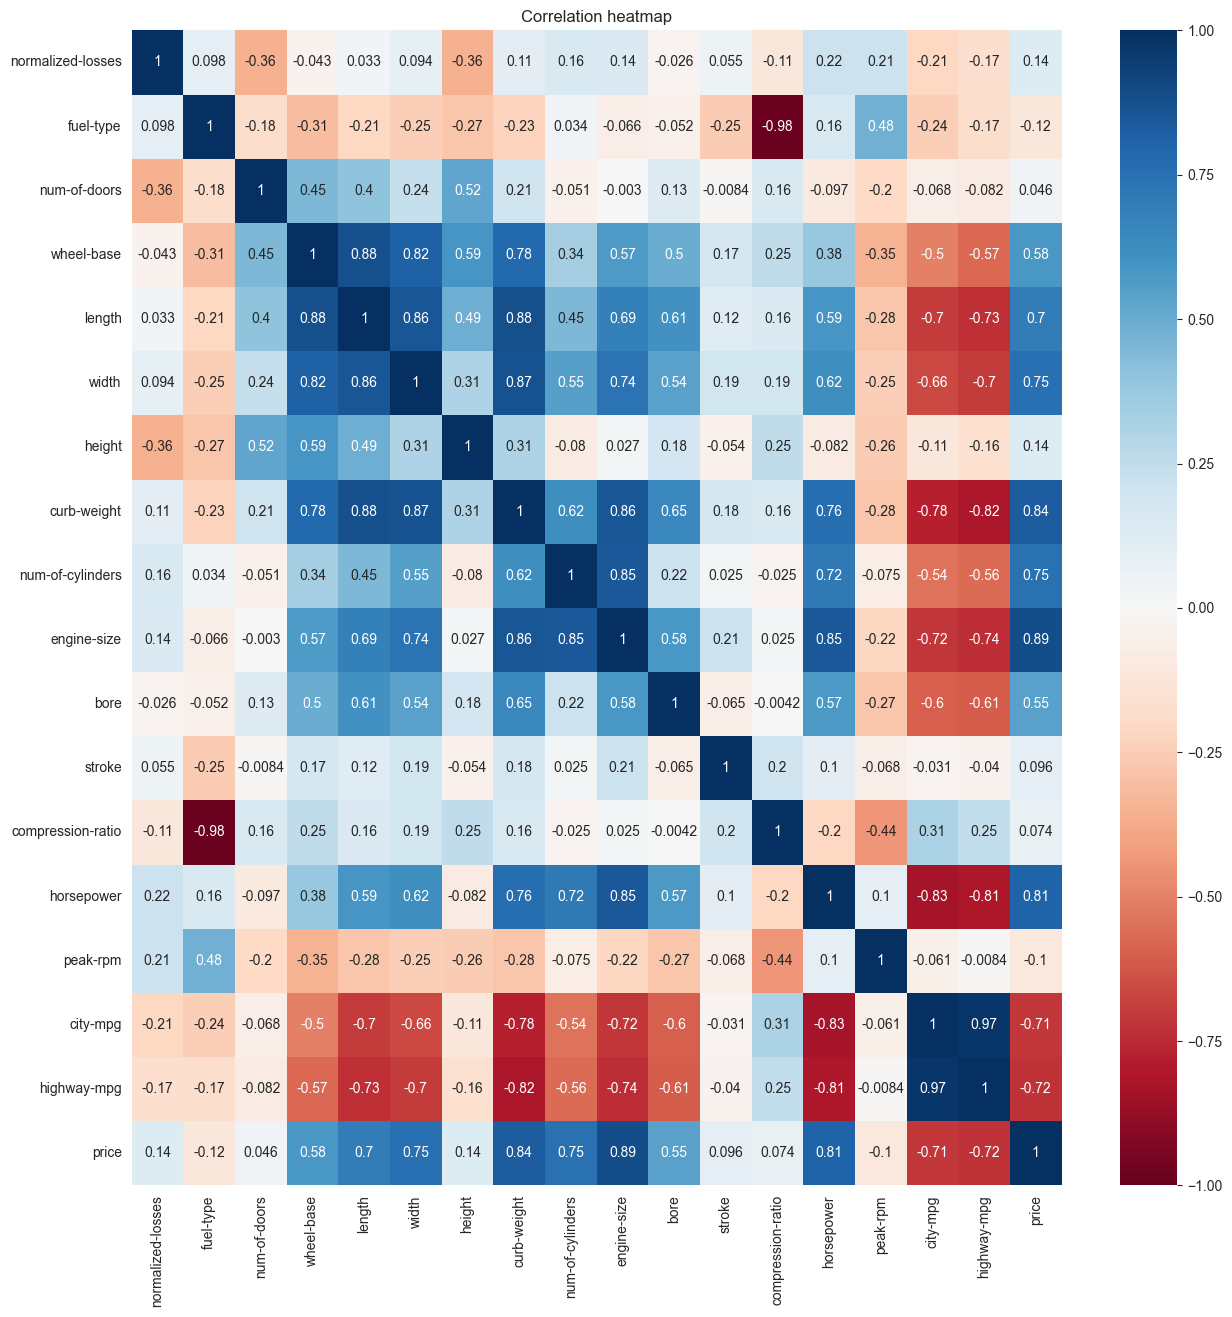

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="RdBu", vmin=-1, vmax=1, annot=True) # vmin: valor minimo / vmax: valor maximo
plt.title("Correlation heatmap")
plt.show()

## 3. Machine learning model

In [47]:
X = df[["fuel-type","num-of-cylinders","engine-size","bore","horsepower"]]
y = df["price"]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(154, 5)
(154,)
(39, 5)
(39,)


In [50]:
lr = LinearRegression().fit(X_train, y_train)

In [51]:
y_pred = lr.predict(X_test)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
# The coefficients
print("Coefficients: \n", lr.coef_)

# Interception
print("Interception: ", lr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_pred, y_test))
# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R-squared): %.2f" % r2_score(y_pred, y_test))
# A value of 1 indicates that predictions are identical to the observed values, it is not possible to have a value of R² of more than 1.

Coefficients: 
 [-3572.66780585   148.46386436   115.06655359   405.02531172
    68.66224516]
Interception:  -7108.888965430739
Mean squared error: 6620133.47
Coefficient of determination (R-squared): 0.73


In [54]:
dump(lr, "Linear-regression-model.joblib")

['Linear-regression-model.joblib']

In [55]:
lrModel = load("Linear-regression-model.joblib")

In [56]:
fuelType = 1
nCylinders = 6
engineSize = 230
bore = 4
horsepower = 200

carData = [[fuelType,nCylinders,engineSize,bore,horsepower]]

In [60]:
prediction = lrModel.predict(carData)
print(f"The model has predicted that the car should be sold for: {prediction} $USD")

The model has predicted that the car should be sold for: [32027.08401989] $USD
